# UPLOAD CSV

In [13]:
# to upload a csv
from google.colab import files
uploaded = files.upload()

Saving iris_with_answers.csv to iris_with_answers.csv


In [69]:
# to upload a csv
from google.colab import files
uploaded = files.upload()

Saving Country+clusters+standardized.csv to Country+clusters+standardized.csv


# BASICS OF CLUSTERING

In [ ]:
# clustering countries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
data = pd.read_csv('Countries-exercise.csv')
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


(-90.0, 90.0)

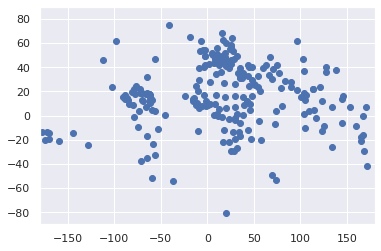

In [ ]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)


In [ ]:
x = data.iloc[:,1:3]    # a new method to slice out the data we want

kmeans = KMeans(7)      # value in parantheses is the number of clusters that we specify
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters.head()

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,6
2,Angola,17.537368,-12.293361,4
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0


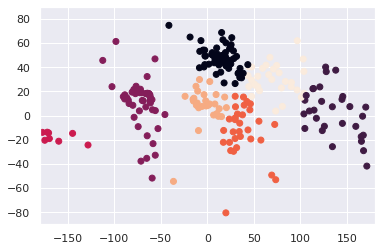

In [ ]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## clustering categorical data

In [ ]:
catdata = pd.read_csv('Categorical (1).csv')
catdata.describe(include='all')

,name,Longitude,Latitude,continent
count,241,241.000000,241.000000,241
unique,241,NaN,NaN,8
top,Timor-Leste,NaN,NaN,Africa
freq,1,NaN,NaN,54
mean,NaN,14.215380,17.169377,NaN
std,NaN,72.013654,26.554014,NaN
min,NaN,-177.348348,-80.508579,NaN
25%,NaN,-36.433184,1.358761,NaN
50%,NaN,18.644925,17.277500,NaN
75%,NaN,47.587005,39.115541,NaN


In [ ]:
mapped_data = catdata.copy()
allContinents = catdata['continent'].unique()

c=0
liss ={}
for i in allContinents:
  liss.update({i:c})
  c +=1;

mapped_data['continent'] = mapped_data['continent'].map(liss)
mapped_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3


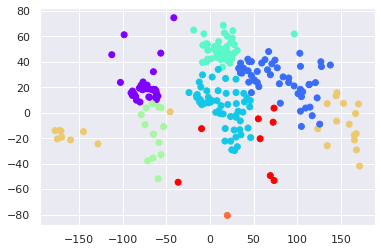

In [ ]:
plt.scatter(mapped_data['Longitude'],mapped_data['Latitude'],c=mapped_data['continent'],cmap='rainbow')

## finding ideal number of clusters

Text(0, 0.5, 'WCSS')

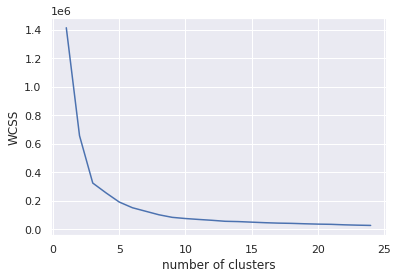

In [ ]:
wcss =[]  # to store within cluster sum of squares

for i in range(1,25):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss = wcss + [kmeans.inertia_]

number_clusters = np.arange(1,25)
plt.plot(number_clusters,wcss)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
# 8-10 clusters seems to be the ideal choice 

Text(0.5, 1.0, '10 clusters')

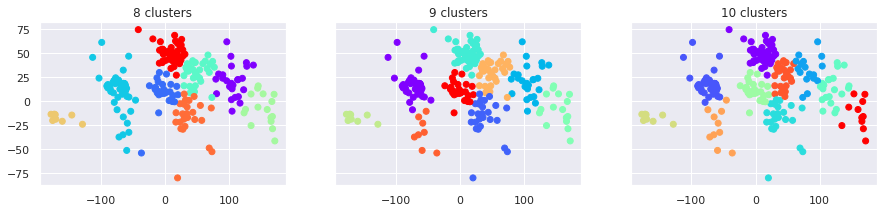

In [ ]:
ktemp = KMeans(8)
indentified_clus8 = ktemp.fit_predict(x)
ktemp = KMeans(9)
indentified_clus9 = ktemp.fit_predict(x)
ktemp = KMeans(10)
indentified_clus10 = ktemp.fit_predict(x)


fig, (a1,a2,a3)= plt.subplots(1,3,sharey=True, figsize = (15,3))
a1.scatter(data['Longitude'],data['Latitude'], c= indentified_clus8,cmap='rainbow')
a1.set_title('8 clusters')
a2.scatter(data['Longitude'],data['Latitude'], c= indentified_clus9,cmap='rainbow')
a2.set_title('9 clusters')
a3.scatter(data['Longitude'],data['Latitude'], c= indentified_clus10,cmap='rainbow')
a3.set_title('10 clusters')



# MARKET SEGMENTATION EXAMPLE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
cusdata = pd.read_csv('3.12.+Example.csv')

cusdata.describe()
# loyalty is standardised

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


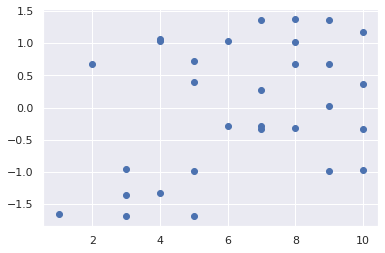

In [ ]:
plt.scatter(cusdata['Satisfaction'],cusdata['Loyalty'])

Text(0.5, 0, 'iterations')

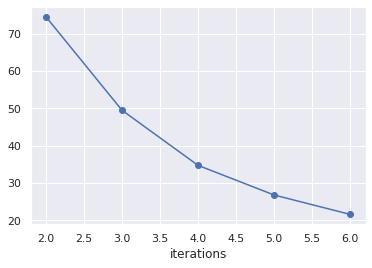

In [ ]:
WCSS =[]
xcus = cusdata.copy()
for j in range(2,7):
  ktemp = KMeans(j)
  ktemp.fit(xcus)
  WCSS = WCSS + [ktemp.inertia_]

plt.plot(np.arange(2,7),WCSS, marker='o')
plt.xlabel('iterations')

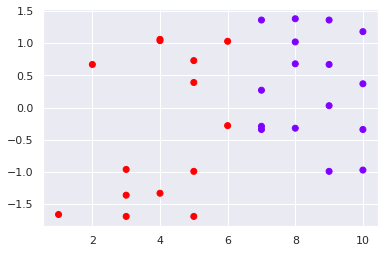

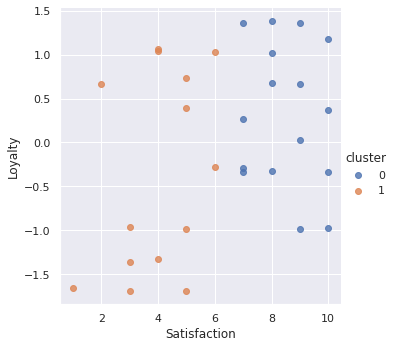

In [ ]:
cuskmeans = KMeans(2)
cus_clus = cuskmeans.fit_predict(xcus)
datainplot = cusdata.copy()
datainplot['cluster']= cus_clus
plt.scatter(cusdata['Satisfaction'],cusdata['Loyalty'], c= cus_clus, cmap ='rainbow')

sns.lmplot(x="Satisfaction", y="Loyalty", data=datainplot,hue = 'cluster',fit_reg=False,)

*there seems to be a vertical line at satisfaction=6, that cuts off the 2 clusters.*

*this shows that satisfaction has been the dominant feature for the algorithm.*

*hence we need to standardise satisfaction as well*

Text(0.5, 0, 'iterations')

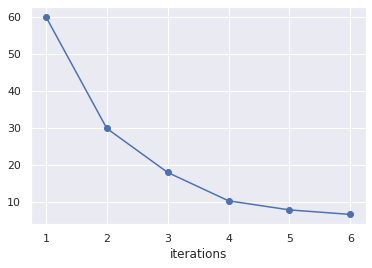

In [ ]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(xcus)
# preprocessing.scale() standardises all columns of the input data

WCSS1 =[]

for j in range(1,7):
  ktemp = KMeans(j)
  ktemp.fit(x_scaled)
  WCSS1 = WCSS1 + [ktemp.inertia_]

plt.plot(np.arange(1,7),WCSS1, marker='o')
plt.xlabel('iterations')

In [ ]:
dataplt3 = cusdata.copy()
dataplt3['cluster']= KMeans(3).fit_predict(x_scaled)

dataplt4 = cusdata.copy()
dataplt4['cluster']= KMeans(4).fit_predict(x_scaled)

dataplt5 = cusdata.copy()
dataplt5['cluster']= KMeans(5).fit_predict(x_scaled)

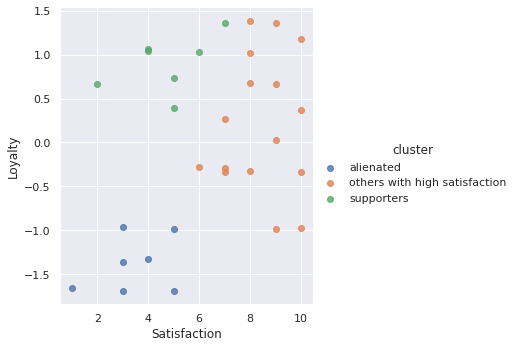

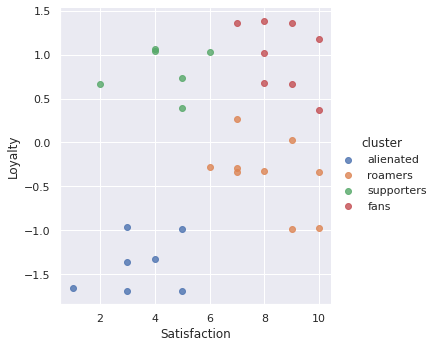

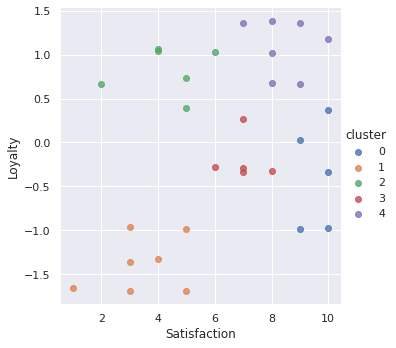

In [ ]:
#dataplt3['cluster']= dataplt3['cluster'].map({0:'alienated',2:'supporters',1:'others with high satisfaction'})
sns.lmplot(x="Satisfaction", y="Loyalty", data=dataplt3,hue='cluster',fit_reg=False)

#dataplt4['cluster']= dataplt4['cluster'].map({1:'alienated',3:'supporters',2:'roamers',0:'fans'})
sns.lmplot(x="Satisfaction", y="Loyalty", data=dataplt4,hue='cluster',fit_reg=False)

#dataplt4['cluster']= dataplt4['cluster'].map({0:'alienated',1:'supporters',2:'others with high satisfaction'})
sns.lmplot(x="Satisfaction", y="Loyalty", data=dataplt5,hue='cluster',fit_reg=False)


# SPECIES SEGMENTATION

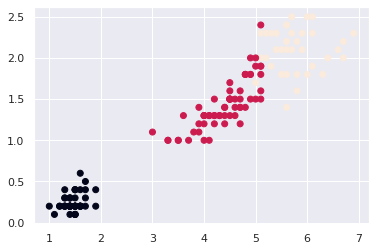

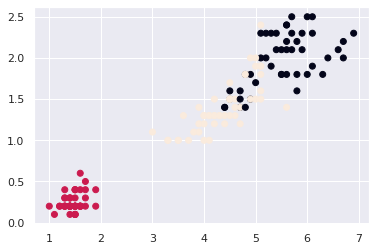

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
species = pd.read_csv('iris_dataset.csv')
from sklearn import preprocessing
scaled_species = preprocessing.scale(species)

kmeans3 = KMeans(3)
classify_3clus = kmeans3.fit_predict(species)

scaled_classify_3clus = kmeans3.fit_predict(scaled_species)

plt.figure(0)
plt.scatter(species['petal_length'],species['petal_width'],c=classify_3clus)
plt.figure(1)
plt.scatter(species['petal_length'],species['petal_width'], c=scaled_classify_3clus)

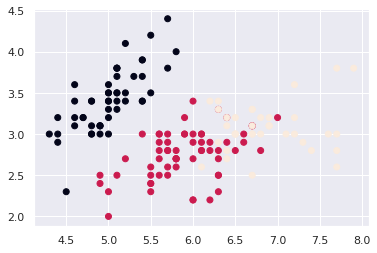

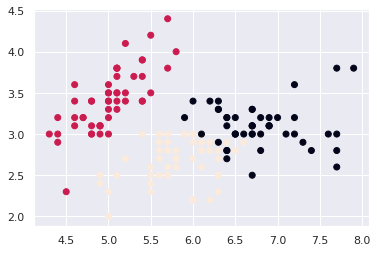

In [51]:
plt.figure(0)
plt.scatter(species['sepal_length'],species['sepal_width'],c=classify_3clus)
plt.figure(1)
plt.scatter(species['sepal_length'],species['sepal_width'],c=scaled_classify_3clus)

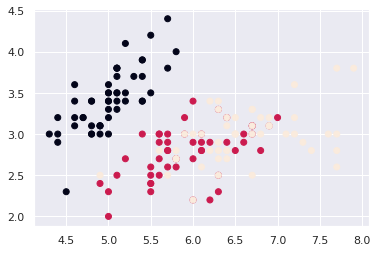

In [64]:
irisans = pd.read_csv('iris_with_answers.csv')
irisans['species'] = irisans['species'].map({'setosa':0,'versicolor':1,'virginica':2})
actual_species = irisans['species']

plt.scatter(species['sepal_length'],species['sepal_width'],c=actual_species)


In [62]:
pred_accu=[]
index = []
for i in range(0,150):
  if(actual_species[i]==classify_3clus[i]):
     pred_accu.append(1)
  else:
     pred_accu.append(0)
     print(str(actual_species[i])+' '+str(classify_3clus[i]))
     index.append(i)

accuracy = sum(pred_accu)/150
accuracy

1 2
1 2
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1


0.8933333333333333

our classification is mostly getting confused between versicolor and virginica

# HEATMAP

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

heatdata = pd.read_csv('Country+clusters+standardized.csv', index_col='Country')
heatdata = heatdata.drop('Language',axis =1)
heatdata

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


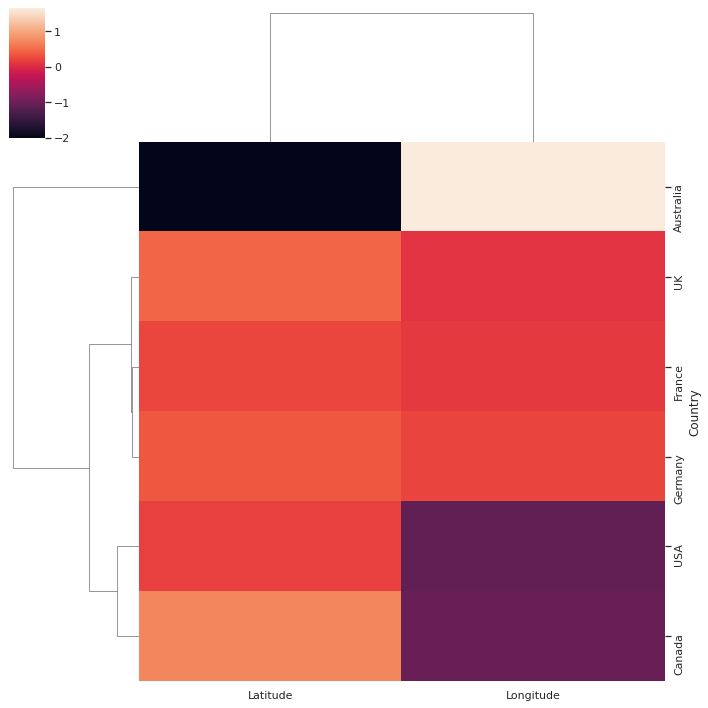

In [72]:
sns.clustermap(heatdata)